# Importing the usual dataframes as well as the dataset

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

%matplotlib inline

In [2]:
df=pd.read_csv('Desktop/Data Material/Obesity Data.csv')

In [3]:
df.head(2)

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years


# Data Wrangling

The dataframe needs some work to drop the unecessary first rows as well as rename the main columns and create different columns based on the data from pre-existing columns

In [4]:
df=df.rename(columns={'Unnamed: 0':'Country'})

In [5]:
df.drop([0,1,2],inplace=True)

In [6]:
df=pd.melt(df,id_vars='Country',var_name='Year',
    value_name='Obesity %')

Creating a gender column based on the info contained in the Gender column and re-maping it

In [7]:
df[['Year','Gender']]=df['Year'].str.split('.',expand=True)

In [8]:
df['Gender']=df['Gender'].map({None:'Both Genders','1':'Male','2':'Female'})

Same for the age column

In [9]:
df['Age standardized estimate']=df['Obesity %'].apply(lambda x:x.split()[1])

In [10]:
df['Obesity %']=df['Obesity %'].apply(lambda x:x.split()[0])

Removing the non-numerical values from the obesity columns, most of the countries with no obesity data available 
are small countries such as Monaco or San Marino so let's remove them. 

In [39]:
df=df[df['Obesity %']!='No']

Text(0.5, 1.0, 'Obesity Rates across the World by gender between 1975 - 2016')

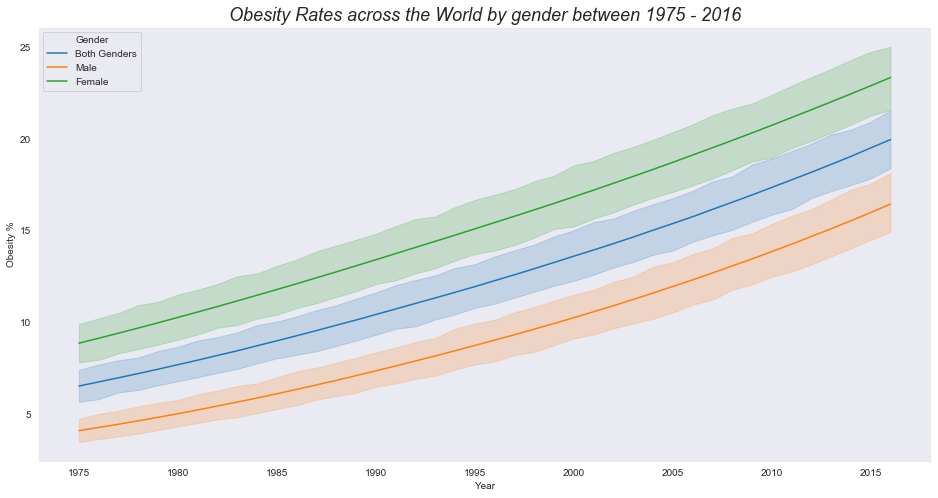

In [57]:
sns.lineplot(x='Year',y='Obesity %',data=df,hue='Gender')
plt.title('Obesity Rates across the World by gender between 1975 - 2016',fontsize=18,fontstyle='italic')

# Filtering the columns to focus on Sweden

In [11]:
Sweden=df.loc[df['Country']=='Sweden']

In [12]:
Sweden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 168 to 24543
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    126 non-null    object
 1   Year                       126 non-null    object
 2   Obesity %                  126 non-null    object
 3   Gender                     126 non-null    object
 4   Age standardized estimate  126 non-null    object
dtypes: object(5)
memory usage: 5.9+ KB


In [47]:
Sweden['Year']=pd.to_datetime(Sweden['Year'])
Sweden['Obesity %']=pd.to_numeric(Sweden['Obesity %'])

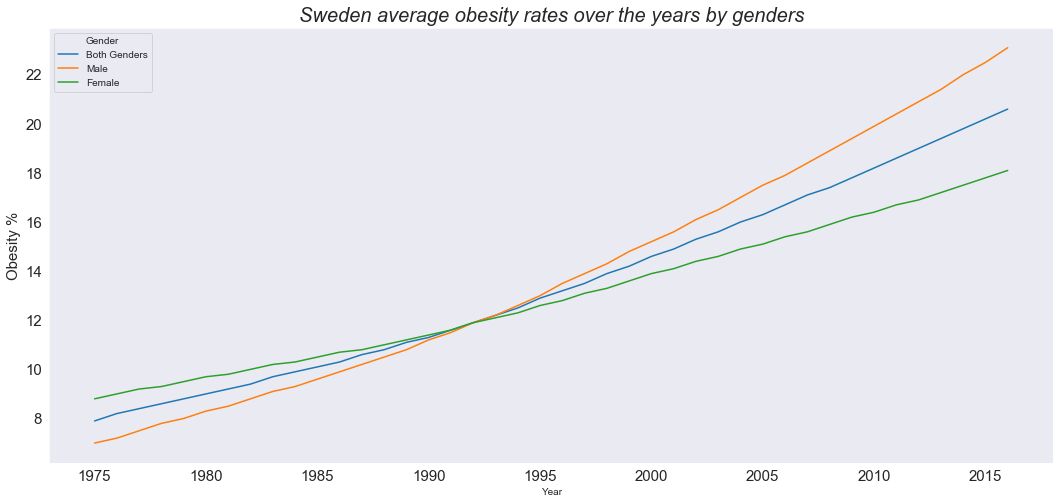

In [14]:
sns.set_style('dark')
plt.figure(figsize=(18,8))
plt.title('Sweden average obesity rates over the years by genders',fontsize=20,fontstyle='italic')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Growth Rate',fontsize=15)
sns.lineplot(x='Year',y='Obesity %',data=Sweden,hue='Gender')

# Comparing Sweden to the rest of the World

In [20]:
df['Year']=pd.to_datetime(df['Year'])
df['Obesity %']=pd.to_numeric(df['Obesity %'])

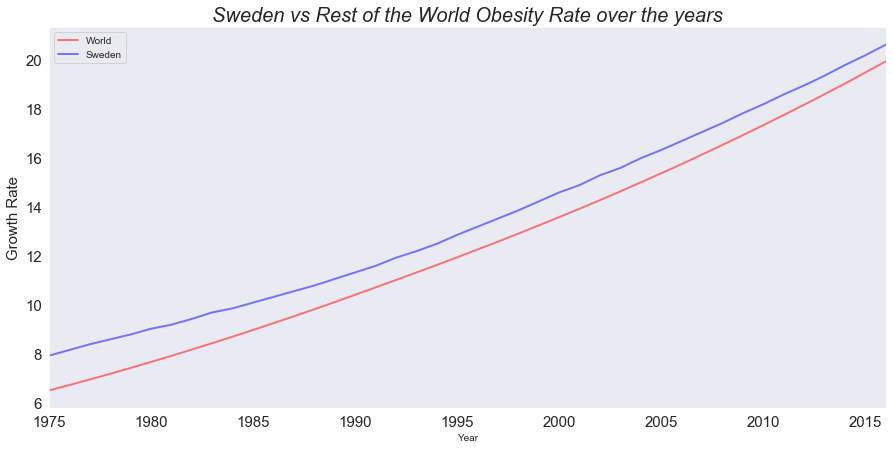

In [21]:
sns.set_style('dark')
plt.figure(figsize=(15,7))


plt.title('Sweden vs Rest of the World Obesity Rate over the years',fontsize=20,fontstyle='italic')


df.groupby('Year').mean()['Obesity %'].plot(color="red",alpha=0.5,linewidth=2,label='World')

Sweden.groupby('Year').mean()['Obesity %'].plot(color="blue",alpha=0.5,linewidth=2,label='Sweden')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Growth Rate',fontsize=15)

plt.legend()

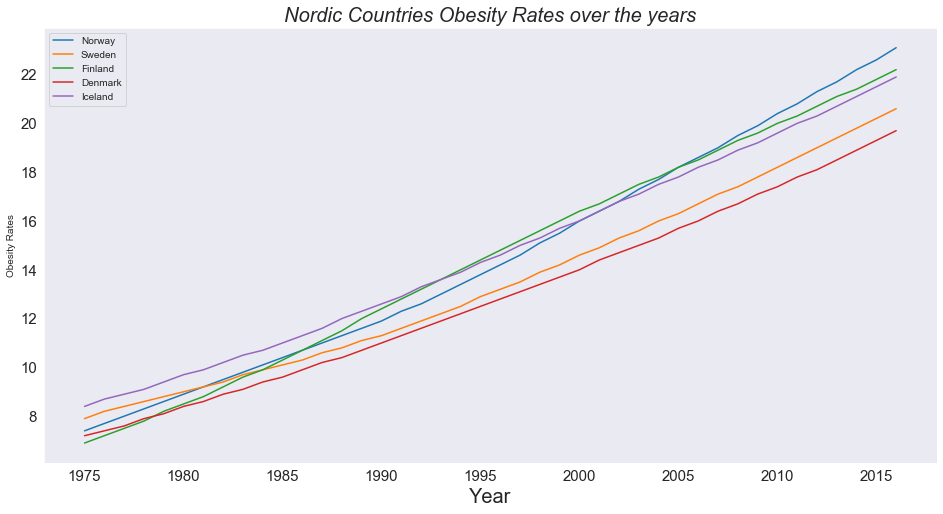

In [37]:
rcParams['figure.figsize'] = 16, 8

nordic_countries=['Norway','Sweden','Finland','Denmark','Iceland']

for nordic_country in nordic_countries:
    plt.plot(df[(df['Country']==nordic_country) & (df['Gender']=='Both Genders')]['Year'], 
    df[(df['Country']==nordic_country) & (df['Gender']=='Both Genders')]['Obesity %'],label=nordic_country,linewidth=1.5)
    plt.xlabel('Year', fontsize=20)
plt.title('Nordic Countries Obesity Rates over the years',fontsize=20,fontstyle='italic')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Obesity Rates')
plt.figsize=(20,10)
plt.legend()

# Calculating the YoY Obesity Growth Rate with the shift function

In [189]:
Sweden=Sweden.sort_index(ascending=False)

In [226]:
Sweden['Growth Rate']=((Sweden['Obesity %'])-Sweden['Obesity %'].shift(3))/(Sweden['Obesity %'].shift(3)).round(1)*100

In [229]:
Sweden.drop('YoY Growth Rate',axis=1,inplace=True)

In [243]:
Sweden.head(10)

,Country,Year,Obesity %,Gender,Age standardized estimate,Lag,Growth Rate
24543,Sweden,1975-01-01,8.8,Female,[5.6-13.0],0,NaN
24348,Sweden,1975-01-01,7.0,Male,[4.5-10.1],0,NaN
24153,Sweden,1975-01-01,7.9,Both Genders,[5.8-10.5],0,NaN
23958,Sweden,1976-01-01,9.0,Female,[5.9-13.0],8.8,2.272727
23763,Sweden,1976-01-01,7.2,Male,[4.8-10.3],7.0,2.857143
...,...,...,...,...,...,...,...
948,Sweden,2015-01-01,22.5,Male,[17.6-27.6],22.0,2.272727
753,Sweden,2015-01-01,20.2,Both Genders,[16.9-23.6],19.8,2.020202
558,Sweden,2016-01-01,18.1,Female,[13.3-23.1],17.8,1.685393
363,Sweden,2016-01-01,23.1,Male,[17.9-28.6],22.5,2.666667


In [48]:
Sweden_both_genders=Sweden[Sweden['Gender']=='Both Genders']
Sweden_both_genders['Year']=Sweden_both_genders['Year'].dt.year

Text(0, 0.5, 'Growth Rate')

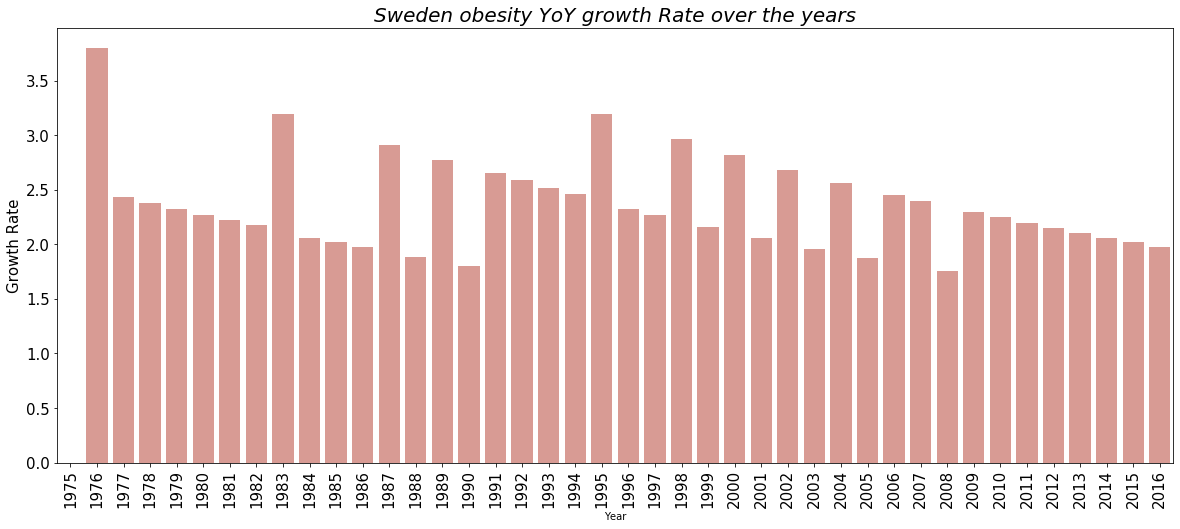

In [258]:
plt.figure(figsize=(20,8))
sns.barplot(x='Year',y='Growth Rate',data=Sweden_both_genders,color="salmon", saturation=.5)
plt.title('Sweden obesity YoY growth Rate over the years',fontsize=20,fontstyle='italic')
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Growth Rate',fontsize=15)